# MNIST Dataset Introduction
A dataset of handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1.
![MNIST](imgs/mnist.png)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils as utils
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [4]:
#The dataset is downloaded for you. this will transform it into PyTorch tensors
mnist_train = datasets.MNIST("/var/local/mnist", train=True, transform=transforms.ToTensor(), download=False)
mnist_test = datasets.MNIST("/var/local/mnist", train=False, transform=transforms.ToTensor(), download=False)
def to_categorical(y):
    # 1-hot encodes a tensor 
    return torch.from_numpy(np.eye(10, dtype='float32')[y])

# Simple Neural Network
![NN](imgs/nn.jpeg)

In [92]:
# Set Data Loader(input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,batch_size=16,shuffle=True)

# create the model
model = torch.nn.Sequential(
    torch.nn.Linear(28*28, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,16),
    torch.nn.ReLU(),
    torch.nn.Linear(16,10)
)
loss_func = nn.MultiLabelSoftMarginLoss()
optimizer = torch.optim.Adam(model.parameters())

In [90]:
# Train the model
loss_arr=[]
for i in range(1):
    for j,[image,label] in enumerate(train_loader):
        image = Variable(image.view(-1,1,28*28))
        label = Variable(to_categorical(label).view(-1,1,10))
        optimizer.zero_grad()
        prediction = model.forward(image)
        loss = loss_func(prediction,label)
        loss.backward()
        optimizer.step()
        loss_arr.append(loss.data.tolist())
        if j % 500 == 0:
            print(loss.data.tolist())

0.6801751852035522
0.11195375770330429
0.1046844869852066
0.20801544189453125
0.06674367934465408
0.099596306681633
0.07238338887691498
0.04316641017794609


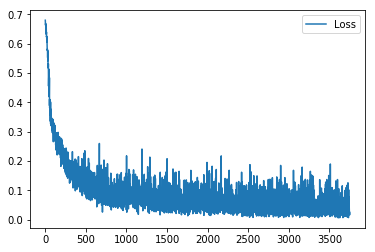

Accuracy on the test data: 0.932


In [91]:
# Plot the training loss curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(loss_arr)), loss_arr, label='Loss')
plt.legend()
plt.show()

# Calculate the accuracy
model.eval()
correct = 0
total = 0

for image,label in test_loader:
    image = Variable(image.view(-1,1,28*28))
    result = model(image)
    pred = torch.argmax(result.data,2).view(-1) 
    total += label.size(0)
    correct += (pred == label).sum().numpy()
print("Accuracy on the test data: {}".format(correct/total))